# Quickstart: Building a GenAI powered Semantic Data Model with Intugle natively in Databricks

This quickstart shows you how to use Intugle’s open-source library to transform fragmented datasets into a connected semantic model. The semantic model captures profiling, relationships, and business meaning of your data — making it instantly usable for exploration, search, and data product creation.

**What is a Semantic Model?**

A semantic model is an intelligent knowledge graph of your data. It connects tables, discovers relationships, and enriches them with business glossaries — so both data teams and business users can query with clarity, not complexity.

**Who is this for?**

*   **Data Engineers & Architects** often spend weeks manually profiling, classifying, and stitching together fragmented data assets. With Intugle, they can automate this process end-to-end, uncovering meaningful links and relationships to instantly generate a connected semantic layer.
*   **Data Analysts & Scientists** spend endless hours on data readiness and preparation before they can even start the real analysis. Intugle accelerates this by providing contextual intelligence, automatically generating SQL and reusable data products enriched with relationships and business meaning.
*   **Business Analysts & Decision Makers** are slowed down by constant dependence on technical teams for answers. Intugle removes this bottleneck by enabling natural language queries and semantic search, giving them trusted insights on demand.

**In this notebook, you will learn how to:**

*   **Generate Semantic Model** → The unified layer that transforms fragmented datasets, creating the foundation for connected intelligence.
    *   **1.1 Profile and classify data** → Analyze your data sources to understand their structure, data types, and other characteristics.
    *   **1.2 Discover links & relationships among data** → Reveal meaningful connections (PK & FK) across fragmented tables.
    *   **1.3 Generate a business glossary** → Create business-friendly terms and use them to query data with context.
    *   **1.4 Enable Semantic search** → Intelligent search that understands meaning, not just keywords—making data more accessible across both technical and business users.
    *   **1.5 Visualize semantic model** → Get access to enriched metadata of the semantic model and visualize your data and relationships.
*   **Build Unified Data Products** → Simply pick the attributes across your data tables, and let the toolkit auto-generate queries with all the required joins, transformations, and aggregations using the semantic layer. When executed, these queries produce reusable data products.
* Sync the semantic model and data products to Databricks Unity Catalog
* Converse with your data using Databricks Genie

Before you start, make sure you install the **Intugle Data Tools** in your environemt: `pip install intugle[databricks]`

## 1. LLM Configuration

Before running the project, you need to configure a Large Language Model (LLM). This is used for tasks like generating business glossaries and predicting links between tables. For the semantic search feature, you will also need to set up Qdrant and provide an OpenAI API key. For detailed setup instructions, please refer to the [README.md](https://github.com/Intugle/data-tools/blob/main/README.md) file.

You can configure the necessary services by setting the following environment variables:

*   `LLM_PROVIDER`: The LLM provider and model to use (e.g., `openai:gpt-3.5-turbo`). The format follows langchain's format for initializing chat models. Checkout how to specify your model [here](https://python.langchain.com/docs/integrations/chat/)
*   `API_KEY`: Your API key for the LLM provider. The exact name of the variable may vary from provider to provider (e.g., `OPENAI_API_KEY`, `ANTHROPIC_API_KEY`).

Here's an example of how to set these variables in your environment:

```bash
export LLM_PROVIDER="openai:gpt-3.5-turbo"
export OPENAI_API_KEY="your-openai-api-key"
```
Alternatively, you can set them in the notebook like this:

In [0]:
import os

from dotenv import load_dotenv

os.environ["LLM_PROVIDER"] = "openai:gpt-3.5-turbo"
os.environ["OPENAI_API_KEY"] = "your-openai-api-key"  # Replace with your actual key


# Load environment variables from .env file
load_dotenv(override=True)



True

> Currently the langchain packages for OpenAI, Anthropic and Gemini is installed by default. For additional models, make sure you have the integration packages installed. E.g. you should have langchain-deepseek installed to use a DeepSeek model. You can get these packages here: [LangChain Chat Models](https://python.langchain.com/docs/integrations/chat/)

## 2. Building the Semantic Model

The `SemanticModel` is the entry point for building your semantic layer. It takes a dictionary of datasets as input and performs the following steps:

1.  **Data Profiling:** Calculates statistics for each column, such as distinct count, uniqueness, and completeness.
2.  **Datatype Identification:** Identifies the data type of each column (e.g., integer, string, datetime).
3.  **Key Identification:** Identifies potential primary keys.
4.  **Glossary Generation:** Generates a business glossary for each column using an LLM.
5.  **Link Prediction:** Predicts the relationships (foreign keys) between tables.

Let's start by defining the datasets we want to use. 

> For this demo, we will be using the technology manufacturing dataset which can be found under [sample_data/tech_manufacturing](https://github.com/Intugle/data-tools/blob/main/notebooks/quickstart_native_snowflake.ipynb) in the repo

In [0]:
def generate_config(table_name: str) -> str:
    """Append the base URL to the table name."""
    return {
        "identifier": table_name,
        "type": "databricks"
    }


table_names = \
[
    "campaigns",
    "campaign_survey",
    "customer_hierarchy",
    "customers",
    "delivery_survey",
    "expense",
    "install_base",
    "inventory",
    "logistics",
    "nps_survey",
    "opportunity",
    "orders",
    "prob_statement_issue",
    "product_feature",
    "product_hierarchy",
    "products",
    "renewals",
    "returns",
    "service_requests",
    "website",
]


datasets = {table: generate_config(table) for table in table_names}

Now, let's use the `SemanticModel` to build our semantic layer:

> The `domain` parameter helps the LLM generate a more contextual business glossary. It specifies the industry domain that the dataset belongs to (e.g., "Healthcare", "Finance", "E-commerce").

In [0]:
from intugle import SemanticModel

# Initialize the semantic model
sm = SemanticModel(datasets, domain="Technology Manufacturing Company")

# Run the prediction
sm.build()

Found existing YAML for 'campaigns'. Checking for staleness.
campaigns loaded
Found existing YAML for 'campaign_survey'. Checking for staleness.
campaign_survey loaded
Found existing YAML for 'customer_hierarchy'. Checking for staleness.
customer_hierarchy loaded
Found existing YAML for 'customers'. Checking for staleness.
customers loaded
Found existing YAML for 'delivery_survey'. Checking for staleness.
delivery_survey loaded
Found existing YAML for 'expense'. Checking for staleness.
expense loaded
Found existing YAML for 'install_base'. Checking for staleness.
install_base loaded
Found existing YAML for 'inventory'. Checking for staleness.
inventory loaded
Found existing YAML for 'logistics'. Checking for staleness.
logistics loaded
Found existing YAML for 'nps_survey'. Checking for staleness.
nps_survey loaded
Found existing YAML for 'opportunity'. Checking for staleness.
opportunity loaded
Found existing YAML for 'orders'. Checking for staleness.
orders loaded
Found existing YAML 

Starting profiling and key identification stage...

Dataset 'campaigns' already profiled. Skipping.
Dataset 'campaign_survey' already profiled. Skipping.
Dataset 'customer_hierarchy' already profiled. Skipping.
Dataset 'customers' already profiled. Skipping.
Dataset 'delivery_survey' already profiled. Skipping.
Dataset 'expense' already profiled. Skipping.
Dataset 'install_base' already profiled. Skipping.
Dataset 'inventory' already profiled. Skipping.
Dataset 'logistics' already profiled. Skipping.
Dataset 'nps_survey' already profiled. Skipping.
Dataset 'opportunity' already profiled. Skipping.
Dataset 'orders' already profiled. Skipping.
Dataset 'prob_statement_issue' already profiled. Skipping.
Dataset 'product_feature' already profiled. Skipping.
Dataset 'product_hierarchy' already profiled. Skipping.
Dataset 'products' already profiled. Skipping.
Dataset 'renewals' already profiled. Skipping.
Dataset 'returns' already profiled. Skipping.
Dataset 'service_requests' already profiled. Skipping.
Dataset 'website' already profiled. Sk

Profiling and key identification complete.

Starting link prediction stage...

Dataset 'campaigns' already processed. Skipping analysis.
Dataset 'campaign_survey' already processed. Skipping analysis.
Dataset 'customer_hierarchy' already processed. Skipping analysis.
Dataset 'customers' already processed. Skipping analysis.
Dataset 'delivery_survey' already processed. Skipping analysis.
Dataset 'expense' already processed. Skipping analysis.
Dataset 'install_base' already processed. Skipping analysis.
Dataset 'inventory' already processed. Skipping analysis.
Dataset 'logistics' already processed. Skipping analysis.
Dataset 'nps_survey' already processed. Skipping analysis.
Dataset 'opportunity' already processed. Skipping analysis.
Dataset 'orders' already processed. Skipping analysis.
Dataset 'prob_statement_issue' already processed. Skipping analysis.
Dataset 'product_feature' already processed. Skipping analysis.
Dataset 'product_hierarchy' already processed. Skipping analysis.
Dataset 'products' already processed. Skipping analysis.
Dataset 'renewals' already

Link predictions are up-to-date. Loading from cache.

Link prediction complete.

Starting business glossary generation stage...

Glossary for 'campaigns' already exists. Skipping.

Glossary for 'campaign_survey' already exists. Skipping.

Glossary for 'customer_hierarchy' already exists. Skipping.

Glossary for 'customers' already exists. Skipping.

Glossary for 'delivery_survey' already exists. Skipping.

Glossary for 'expense' already exists. Skipping.

Glossary for 'install_base' already exists. Skipping.

Glossary for 'inventory' already exists. Skipping.

Glossary for 'logistics' already exists. Skipping.

Glossary for 'nps_survey' already exists. Skipping.

Glossary for 'opportunity' already exists. Skipping.

Glossary for 'orders' already exists. Skipping.

Glossary for 'prob_statement_issue' already exists. Skipping.

Glossary for 'product_feature' already exists. Skipping.

Glossary for 'product_hierarchy' already exists. Skipping.

Glossary for 'products' already exists. Skipping.

Glossary for 'renewals' already exists. Skipping.

Glossary for 'returns' already exists. Skipping.

Glossary for 'service_requests' already exists. Skipping.

Glossary for 'website' already exists. Skipping.

Business glossary generation complete.

Initializing semantic search...


Could not initialize semantic search: Error code: 401 - {'error': {'message': 'Incorrect API key provided: your-ope*******-key. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}
Semantic search initialization failed during build: Error code: 401 - {'error': {'message': 'Incorrect API key provided: your-ope*******-key. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}


## 3. Accessing Enriched Metadata

Now that the semantic model is built, you can easily access the enriched metadata for each dataset.

### Accessing a Dataset

You can access a specific dataset by its name from the `sm.datasets` dictionary:

In [0]:
products_dataset = sm.datasets['products']
products_dataset.profiling_df

,column_name,table_name,business_name,datatype_l1,datatype_l2,business_glossary,business_tags,count,null_count,distinct_count,uniqueness,completeness,sample_data
0,Product ID,products,product_id,alphanumeric,dimension,Serves as a unique identifier for individual i...,"[Product Identification, Inventory Tracking, M...",1000,0,1000,1.000,1.0,"[PROD-11196, PROD-11735, PROD-11723, PROD-1140..."
1,Product Name,products,product_name,close_ended_text,dimension,Identifies the name used to distinguish a spec...,"[Product Portfolio, Technology Solutions, Bran...",1000,0,5,0.005,1.0,"[CoreAnalytics, CloudEdge, NetConnect, Insight..."
2,Product Category,products,product_category,close_ended_text,dimension,Groups products into predefined classification...,"[Technology Solutions, Business Segmentation, ...",1000,0,5,0.005,1.0,"[Networking, Cloud Platform, IoT, Security, An..."
3,Product Status,products,product_status,close_ended_text,dimension,Indicates the current lifecycle phase of a pro...,"[Lifecycle Management, Product Development Sta...",1000,0,5,0.005,1.0,"[In Development, GA (General Availability), Ac..."
4,R&D Initiation Date,products,r_d_initiation_date,date & time,dimension,Marks the date when the research and developme...,"[Research And Development Timeline, Product De...",1000,0,777,0.777,1.0,"[2022-06-05, 2025-01-08, 2021-07-07, 2023-02-0..."
5,R&D Stage,products,r_d_stage,close_ended_text,dimension,Indicates the current phase of development and...,"[Product Development Lifecycle, Innovation Tra...",1000,0,5,0.005,1.0,"[Concept, Pre-Launch, Enhancement, Testing, Pr..."
6,Launch Status,products,launch_status,close_ended_text,dimension,Indicates the current phase or outcome of a pr...,"[Product Lifecycle, Launch Planning, Market Re...",1000,0,5,0.005,1.0,"[Not Launched, Planned, Launched, Cancelled, I..."
7,Launch Date,products,launch_date,date & time,dimension,Indicates the scheduled date and time when a p...,"[Product Launch Timeline, Go-To-Market Strateg...",1000,0,659,0.659,1.0,"[2025-07-14, 2025-07-03, 2025-03-15, 2024-07-2..."
8,PM Name,products,pm_name,close_ended_text,dimension,Identifies the individual responsible for mana...,"[Product Manager, Responsible Party, Ownership]",1000,0,994,0.994,1.0,"[Lucas Marsh, Jillian Brady, Theresa Hall, Bri..."
9,Product Cost ($),products,product_cost,integer,measure,Monetary value associated with the production ...,"[Product Manufacturing Cost, Cost Analysis, Fi...",1000,0,998,0.998,1.0,"[189597, 576010, 217526, 391686, 218954, 26701..."


The profiling results can be accessed through the `profiling_df` property of the `DataSet` object. It's a pandas DataFrame that you can easily explore. 
> The business glossary is also available in the `profiling_df`:

### Visualizing Relationships

The `SemanticModel` automatically discovers the relationships between your tables. You can access the predicted links as a list of `PredictedLink` objects:

In [0]:
sm.links

[PredictedLink(from_dataset='campaigns', from_column='Campaign ID', to_dataset='campaign_survey', to_column='Camp ID', intersect_count=635, intersect_ratio_from_col=0.634, intersect_ratio_to_col=1.0, accuracy=1.0),
 PredictedLink(from_dataset='campaigns', from_column='Prospect ID', to_dataset='customers', to_column='C_ID', intersect_count=622, intersect_ratio_from_col=1.0, intersect_ratio_to_col=0.622, accuracy=1.0),
 PredictedLink(from_dataset='campaigns', from_column='Prod_ID', to_dataset='products', to_column='Product ID', intersect_count=633, intersect_ratio_from_col=1.0, intersect_ratio_to_col=0.633, accuracy=1.0),
 PredictedLink(from_dataset='campaigns', from_column='Campaign ID', to_dataset='website', to_column='Cmgn ID', intersect_count=618, intersect_ratio_from_col=0.618, intersect_ratio_to_col=1.0, accuracy=1.0),
 PredictedLink(from_dataset='customer_hierarchy', from_column='Party ID', to_dataset='customers', to_column='C_ID', intersect_count=616, intersect_ratio_from_col=1.0

You can also visualize these relationships as a graph. In case you run into an error, make sure you install/upgrade your ipykernel package:
> %pip install --upgrade ipykernel

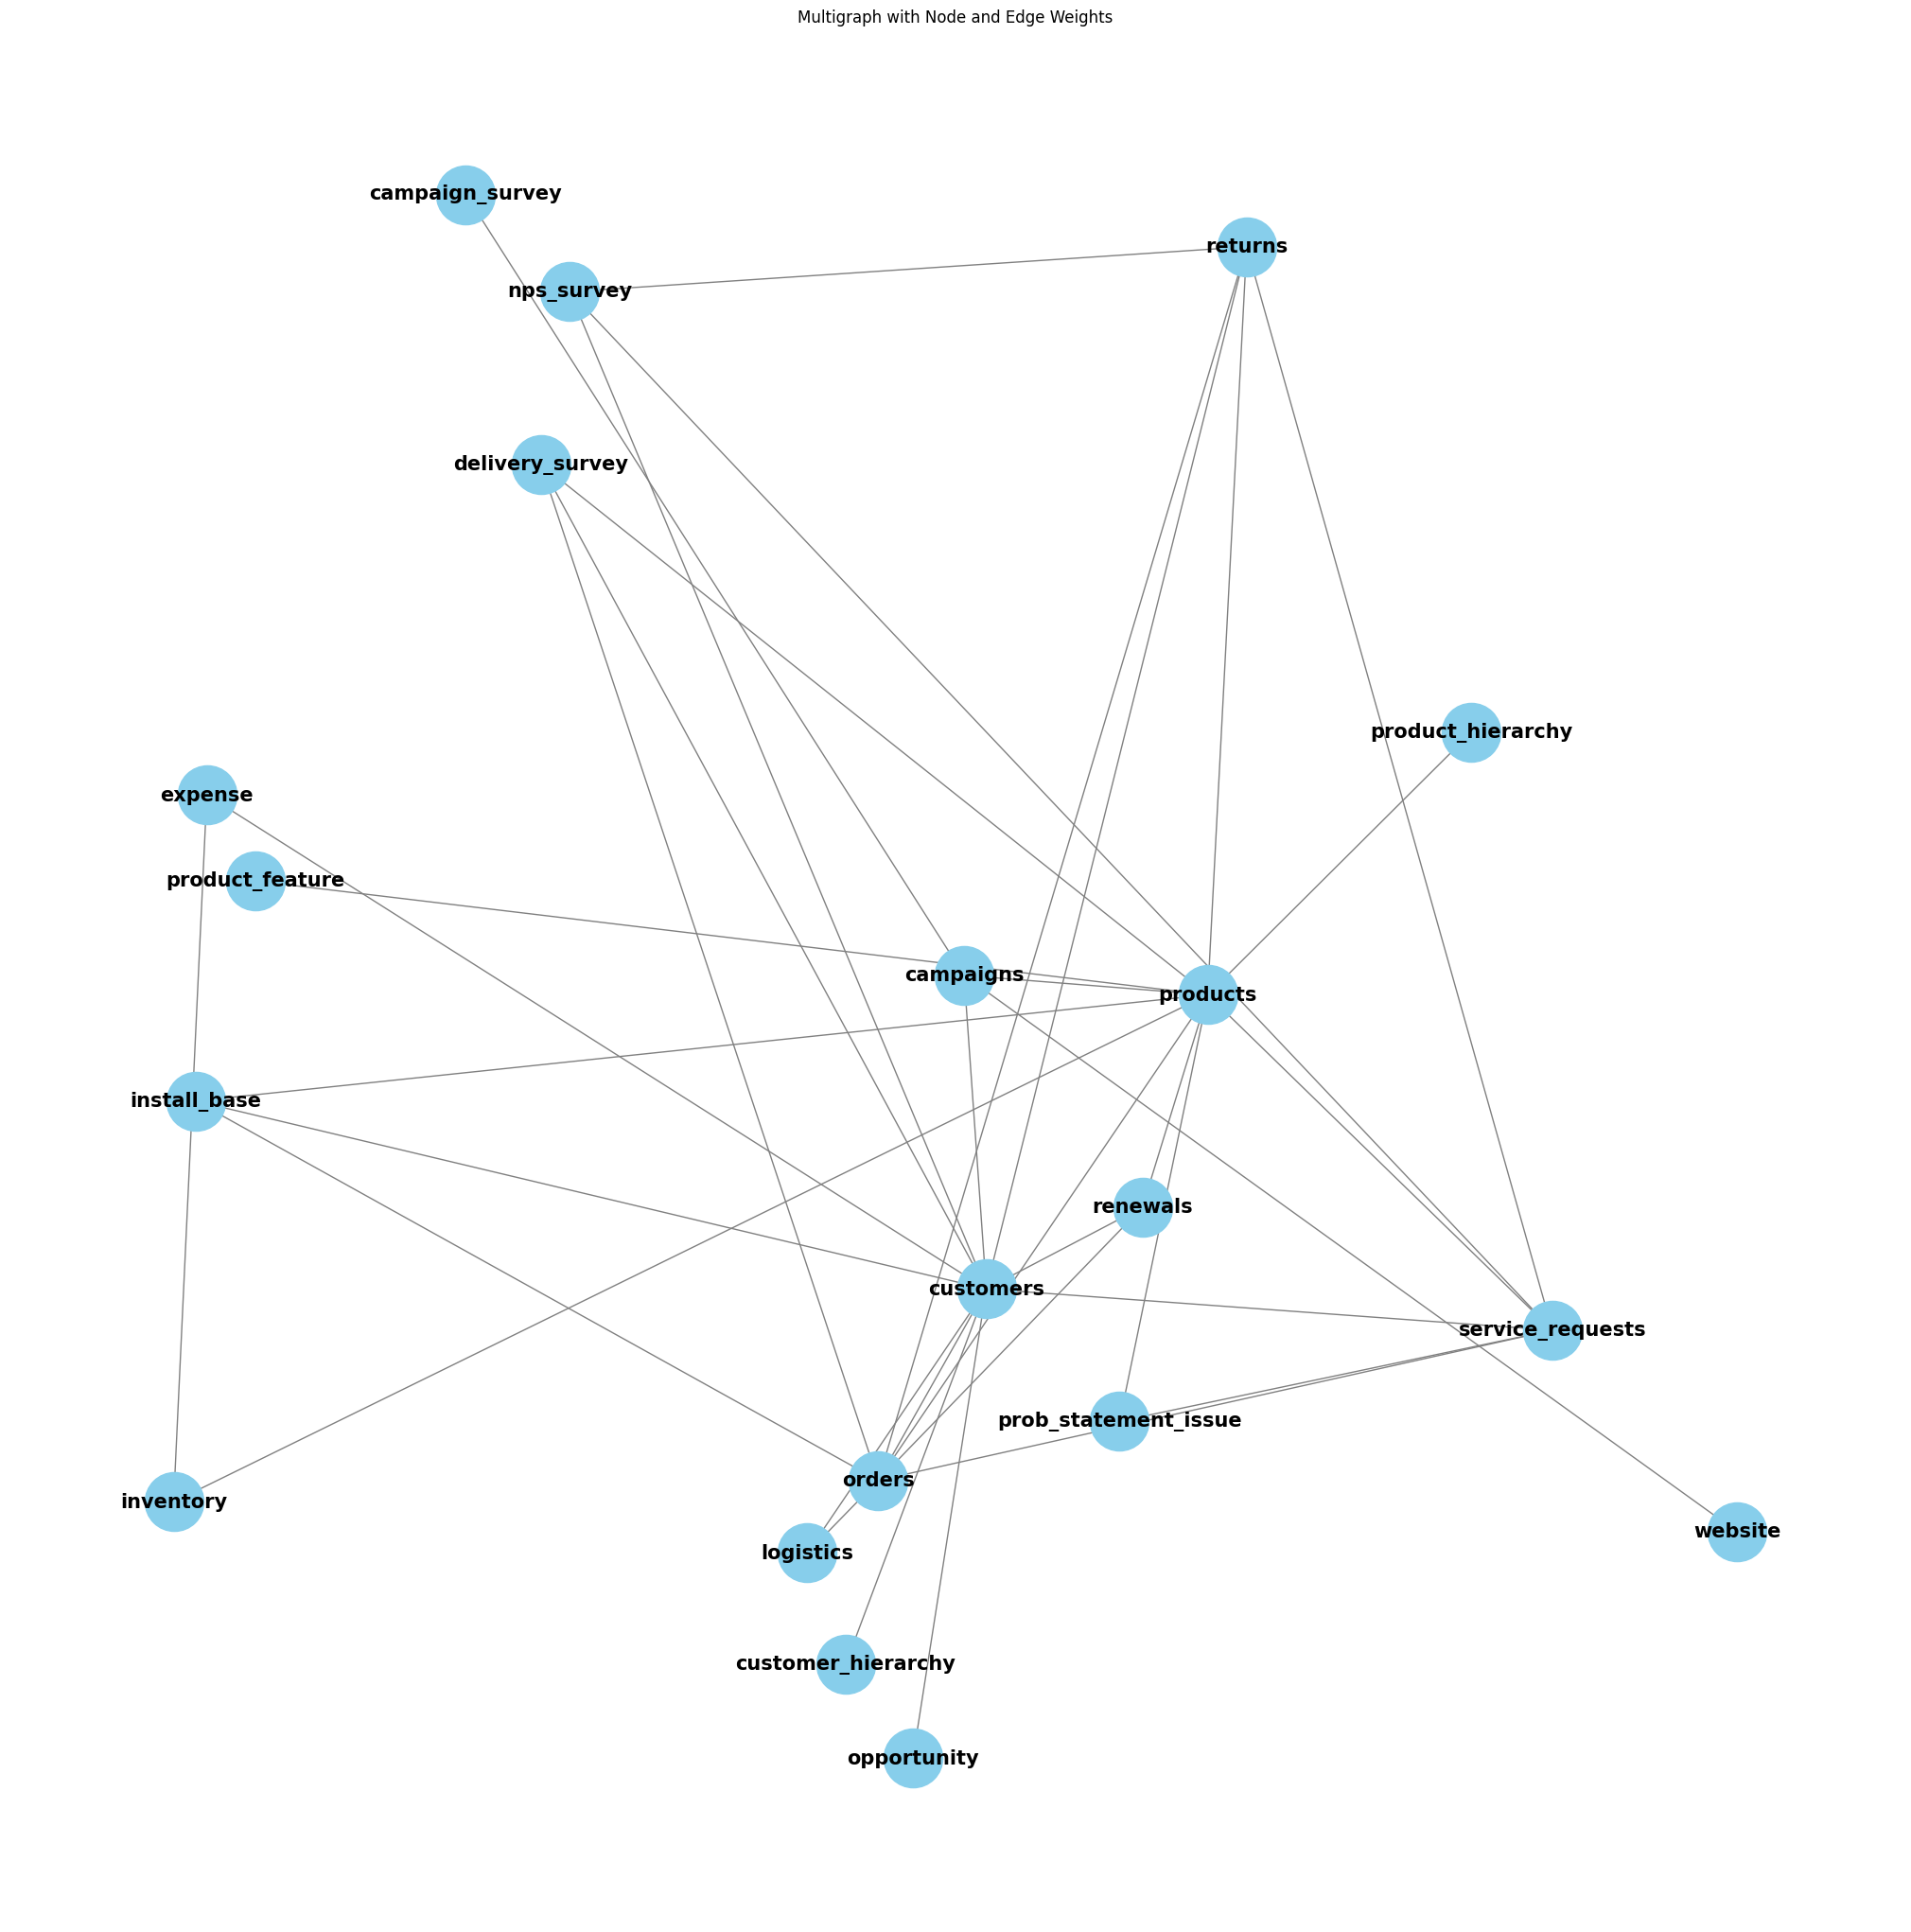

In [0]:
sm.visualize()  # To visualize the relationships as a graph

## 4. The Semantic Layer

The SemanticModel results are used to generate YAML files which are saved automatically. These files defines the semantic layer, including the models (tables) and their relationships. 

By default, these files are saved in the current working directory under `intugle/models`. You can configure this path by setting the `MODELS_DIR` environment variable.

## 5. Deploying to Databricks

Syncs the business glossaries, tags, primary keys and relationsips with the source tables. 

In [0]:
sm.deploy('databricks', sync_glossary=True, sync_tags=True, set_primary_keys=True, set_foreign_keys=True)

Starting deployment to 'databricks' based on project YAML files...

Setting primary key constraints...
Set primary key on `intugle`.`tech_manufacturing`.`product_hierarchy` (`SKU ID`)
Skipping primary key for table 'product_feature' due to missing or invalid key.
Set primary key on `intugle`.`tech_manufacturing`.`website` (`Customer Session ID`)
Set primary key on `intugle`.`tech_manufacturing`.`prob_statement_issue` (`Issue ID`)
Set primary key on `intugle`.`tech_manufacturing`.`customer_hierarchy` (`Account Manager`)
Set primary key on `intugle`.`tech_manufacturing`.`campaigns` (`Campaign ID`)
Set primary key on `intugle`.`tech_manufacturing`.`products` (`Product ID`)
Set primary key on `intugle`.`tech_manufacturing`.`service_requests` (`SR ID`)
Set primary key on `intugle`.`tech_manufacturing`.`logistics` (`Logistics ID`)
Set primary key on `intugle`.`tech_manufacturing`.`customers` (`C_ID`)
Set primary key on `intugle`.`tech_manufacturing`.`expense` (`Expense ID`)
Set primary key on `intugle`.`tech_manufacturing`.`install_base` (`Order ID`)
Set pri

Successfully deployed semantic model to 'databricks'.

## 6. Data Product Creation

The semantic layer serves as a foundation for the DataProduct, which streamlines the creation of reusable data products. This allows you
to encapsulate business logic and create standardized, trustworthy data assets that can be easily shared and reused across different teams and 
applications.

Let's define the model for the data product we want to build:

In [0]:
data_product_config = \
{
  "name": "customer_kpi_summary",
  "fields": [
    {
      "id": "customers.C_ID",
      "name": "c_id"
    },
    {
      "id": "customers.Customer Name",
         "name": "customer_name"
       },
       {
         "id": "customer_hierarchy.Global / Parent Account",
         "name": "global_parent_account"
       },
       {
         "id": "customer_hierarchy.Region",
         "name": "region"
       },
       {
         "id": "customer_hierarchy.Global / Local Entity",
         "name": "global_local_entity"
       },
       {
         "id": "products.Product Name",
         "name": "product_name"
       },
       {
         "id": "orders.Order Value ($)",
         "name": "sum_order_value",
         "category": "measure",
         "measure_func": "sum"
       },
       {
         "id": "orders.Order ID",
         "name": "count_distinct_order_id",
         "category": "measure",
         "measure_func": "count"
       },
       {
         "id": "orders.Order Qty",
         "name": "sum_order_qty",
         "category": "measure",
         "measure_func": "sum"
       },
       {
         "id": "service_requests.SR ID",
         "name": "count_distinct_sr_id",
         "category": "measure",
         "measure_func": "count"
       },
       {
         "id": "service_requests.Prod ID",
         "name": "count_distinct_prod_id",
         "category": "measure",
         "measure_func": "count"
       },
       {
         "id": "returns.R Order ID",
         "name": "count_distinct_r_order_id",
         "category": "measure",
         "measure_func": "count"
       },
       {
         "id": "nps_survey.Survey Score",
         "name": "sum_survey_score",
         "category": "measure",
         "measure_func": "sum"
       }
     ]
   }

> Checkout the Intugle documentation to learn how to add sorting and filters to your data product

Now, let's use the `DataProduct` to generate the data product:

In [0]:
from intugle import DataProduct

# Create a DataProduct
dp = DataProduct()

# Generate the data product
data_product = dp.build(data_product_config)

data_product.to_df()

Found existing YAML for 'product_hierarchy'. Checking for staleness.
product_hierarchy loaded
Found existing YAML for 'product_feature'. Checking for staleness.
product_feature loaded
Found existing YAML for 'website'. Checking for staleness.
website loaded
Found existing YAML for 'prob_statement_issue'. Checking for staleness.
prob_statement_issue loaded
Found existing YAML for 'customer_hierarchy'. Checking for staleness.
customer_hierarchy loaded
Found existing YAML for 'campaigns'. Checking for staleness.
campaigns loaded
Found existing YAML for 'products'. Checking for staleness.
products loaded
Found existing YAML for 'service_requests'. Checking for staleness.
service_requests loaded
Found existing YAML for 'logistics'. Checking for staleness.
logistics loaded
Found existing YAML for 'customers'. Checking for staleness.
customers loaded
Found existing YAML for 'expense'. Checking for staleness.
expense loaded
Found existing YAML for 'install_base'. Checking for staleness.
instal

,c_id,customer_name,global_parent_account,region,global_local_entity,product_name,sum_order_value,count_distinct_order_id,sum_order_qty,count_distinct_sr_id,count_distinct_prod_id,count_distinct_r_order_id,sum_survey_score
0,CUST-10521,"Morris, Tate and Woods",Powell Holdings,Europe,Local,CoreAnalytics,NaN,0,NaN,0,0,0,22
1,CUST-10902,"Allen, Hernandez and Tyler",Schultz-Reyes Holdings,Middle East,Global,None,NaN,0,NaN,0,0,0,5
2,CUST-10214,"King, Reynolds and Kennedy","Anderson, Holdings",APAC,Local,None,NaN,0,NaN,0,0,0,29
3,CUST-10976,Rush LLC,Schultz-Vargas Holdings,North America,Global,CloudEdge,53870.0,4,158.0,4,4,4,14
4,CUST-10502,Conner Inc,Warren Holdings,APAC,Local,CoreAnalytics,22939.0,2,49.0,2,2,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,CUST-10668,"Jefferson, Riggs and Morrow",Bennett-Flores Holdings,Europe,Global,None,NaN,0,NaN,0,0,0,14
1085,CUST-10050,Glover Group,None,None,None,DataSphere,22286.0,1,28.0,1,1,1,9
1086,CUST-10870,"Wiley, Perez and Ruiz",Walker-Shea Holdings,APAC,Local,CoreAnalytics,12736.0,1,21.0,1,1,1,7
1087,CUST-10384,"Rice, Phillips and Smith",Berry-Bates Holdings,North America,Global,CoreAnalytics,7256.0,1,1.0,1,1,1,9


The `build` function returns a `DataSet` object. You can also view the generated SQL query used for creating the data product:

In [0]:
# The generated SQL query
data_product.sql_query

'SELECT `customers`.`C_ID` AS c_id, `customers`.`Customer Name` AS customer_name, `customer_hierarchy`.`Global / Parent Account` AS global_parent_account, `customer_hierarchy`.`Region` AS region, `customer_hierarchy`.`Global / Local Entity` AS global_local_entity, `products`.`Product Name` AS product_name, SUM(`orders`.`Order Value ($)`) AS sum_order_value, COUNT(`orders`.`Order ID`) AS count_distinct_order_id, SUM(`orders`.`Order Qty`) AS sum_order_qty, COUNT(`service_requests`.`SR ID`) AS count_distinct_sr_id, COUNT(`service_requests`.`Prod ID`) AS count_distinct_prod_id, COUNT(`returns`.`R Order ID`) AS count_distinct_r_order_id, SUM(`nps_survey`.`Survey Score`) AS sum_survey_score FROM nps_survey LEFT JOIN customers ON `customers`.`C_ID` = `nps_survey`.`Customer_ID` LEFT JOIN customer_hierarchy ON `customer_hierarchy`.`Party ID` = `customers`.`C_ID` LEFT JOIN campaigns ON `campaigns`.`Prospect ID` = `customers`.`C_ID` LEFT JOIN products ON `campaigns`.`Prod_ID` = `products`.`Produc

### Enriching the Data Product

The `data_product` is in itself a DataSet object. Hence we can run generate glossaries for it as well. 

In [0]:
data_product.run(domain="Technology Manufacturing Company")
data_product.profiling_df

I0000 00:00:1759658943.597447   27837 fork_posix.cc:75] Other threads are currently calling into gRPC, skipping fork() handlers
I0000 00:00:1759658943.622177   27837 fork_posix.cc:75] Other threads are currently calling into gRPC, skipping fork() handlers
/databricks/python/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/databricks/python/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

,column_name,table_name,business_name,datatype_l1,datatype_l2,business_glossary,business_tags,count,null_count,distinct_count,uniqueness,completeness,sample_data
0,c_id,customer_kpi_summary,c_id,alphanumeric,L2OutputTypes.dimension,Identifies individual customers for tracking a...,"[Customer Identifier, Customer Record Tracking...",1089,0,615,0.564738,1.000000,"[CUST-10707, CUST-10806, CUST-10591, CUST-1048..."
1,customer_name,customer_kpi_summary,customer_name,close_ended_text,L2OutputTypes.dimension,Identifies the legal or commercial entity asso...,"[Customer Identification, Business Entity Name...",1089,0,599,0.550046,1.000000,"[Lee PLC, Turner, Butler and Morgan, House-Ram..."
2,global_parent_account,customer_kpi_summary,global_parent_account,close_ended_text,L2OutputTypes.dimension,Identifies the overarching corporate entity as...,"[Global Account Hierarchy, Parent Company Iden...",1089,299,409,0.375574,0.725436,"[French Holdings, Morales Holdings, Perez-Camp..."
3,region,customer_kpi_summary,region,close_ended_text,L2OutputTypes.dimension,Geographical area associated with customer per...,"[Geographical Region, Market Segmentation, Reg...",1089,299,5,0.004591,0.725436,"[APAC, Europe, LATAM, North America, Middle East]"
4,global_local_entity,customer_kpi_summary,global_local_entity,close_ended_text,L2OutputTypes.dimension,Indicates whether a customer-related metric is...,"[Entity Scope, Operational Coverage, Geographi...",1089,299,2,0.001837,0.725436,"[Local, Global]"
5,product_name,customer_kpi_summary,product_name,close_ended_text,L2OutputTypes.dimension,Name of a product associated with customer per...,"[Product Portfolio, Customer Offering, Technol...",1089,329,5,0.004591,0.697888,"[CoreAnalytics, NetConnect, Insight360, DataSp..."
6,sum_order_value,customer_kpi_summary,sum_order_value,integer,L2OutputTypes.measure,Aggregates the total monetary value of all ord...,"[Customer Order Value, Revenue Aggregation, Sa...",1089,562,342,0.314050,0.483930,"[8922, 69204, 2469, 18393, 75163, 62820, 6389,..."
7,count_distinct_order_id,customer_kpi_summary,count_distinct_order_id,integer,L2OutputTypes.measure,Tracks the total number of unique orders assoc...,"[Customer Order Metrics, Unique Order Tracking...",1089,0,14,0.012856,1.000000,"[10, 4, 6, 3, 14, 2, 12, 1, 5, 0]"
8,sum_order_qty,customer_kpi_summary,sum_order_qty,integer,L2OutputTypes.measure,Aggregates the total quantity of orders associ...,"[Customer Order Volume, Sales Performance Metr...",1089,562,138,0.126722,0.483930,"[116, 96, 54, 7, 50, 232, 76, 52, 61, 15]"
9,count_distinct_sr_id,customer_kpi_summary,count_distinct_sr_id,integer,L2OutputTypes.measure,Tracks the number of unique service request id...,"[Service Request Tracking, Customer Interactio...",1089,0,14,0.012856,1.000000,"[14, 5, 6, 1, 0, 20, 2, 12, 3, 9]"


### Syncing with Databricks Unity Catalog
Lets sync the data product with the Databricks Unity Catalog as well

In [0]:
sm.deploy('databricks')

Starting deployment to 'databricks' based on project YAML files...

Syncing metadata to Databricks tables...
Metadata sync complete.


Successfully deployed semantic model to 'databricks'.

%md
>Now that you have synced with databricks, you can use **AI|BI Genie** to **converse with your data** using natural language. AI|BI Genie leverages the relationships and context that were synced to databricks to answer questions without requiring you to write SQL.
To get started, navigate to **Genie** -> Create a new space -> Pick your datasets and start conversing

## Conclusion

You've learned how to:

*   Configure your LLM provider
*   Build a semantic model using the `SemanticModel`.
*   Access enriched metadata, business glossaries and visualize the relationships between your tables.
*   Generate data products from the semantic layer using the `DataProduct`.
*   Sync the semantic model with Databricks Unity Catalog
* Converse with your data using AI|BI Genie

This is just a starting point. This project has many other features to explore. We encourage you to try it with your own data and see how it can help you build a powerful semantic layer.